<a href="https://colab.research.google.com/github/Sara19598/Seoul-Bike-Rental-Prediction---ML-Supervised/blob/main/Bike_Sharing_Demand_Prediction_Poonam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [180]:
#loading the libraries
import pandas as pd                 #Extensively used to load and wrangle with the dataset.
import numpy as np                  #For some math operations in predictions
import matplotlib.pyplot as plt     #Used for visualization.
import seaborn as sns               #Used for visualization.
import missingno as mno             #install  pip install missingno
import warnings                     #For filtering and ignoring the warnings.
warnings.filterwarnings('ignore')
from datetime import date           #Used for analysing the date variable
from scipy import stats             #used for statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor        #For Multicolinearity
from sklearn.model_selection import train_test_split
import os


In [181]:
# Mounting Drive-
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [182]:
# Loading Data set of csv file-
bike_df=pd.read_csv('/content/drive/MyDrive/Capstone Project 2 Supervised ML Regression/ SeoulBikeData.csv',encoding='ISO-8859-1')

In [183]:
#let's observe the data set-
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [184]:
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [185]:
#Shape of the dataset
bike_df.shape

(8760, 14)

In [186]:
#all the columns in the dataset
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [187]:
#the number of unique values that each column contains
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [188]:
#showing the datatype of all features
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [189]:
#Summary of the dataset
bike_df.describe()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [190]:
#Missing values in dataset
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

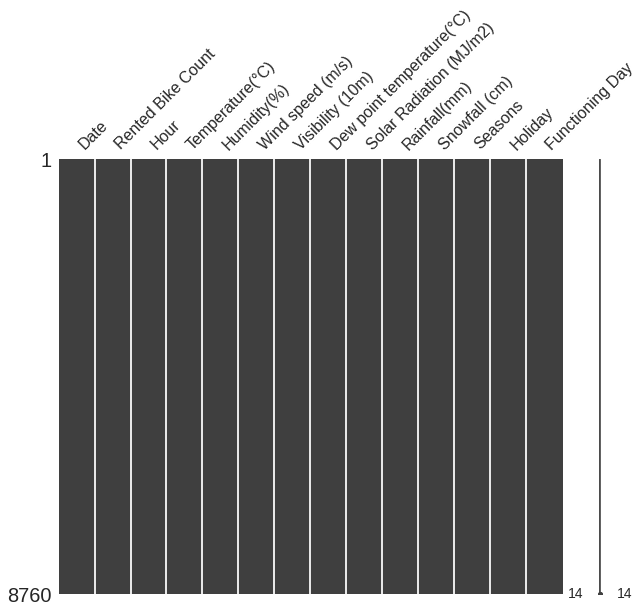

In [191]:
#checking for nan values
mno.matrix(bike_df,figsize=(10,8))

***Comment:- There is no missing values in dataset.***

## **Conversion of Date column using Datetime type-**

In [192]:
# feature engineering-
bike_df['Date'] = pd.to_datetime(bike_df['Date'])
bike_df['Year'] =bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['Day'] = bike_df['Date'].dt.day
bike_df['Day_name'] = bike_df['Date'].dt.day_name()

In [193]:
#dataframe after adding the columns
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_name
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday


In [194]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_name
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday


**Rename Columns to call columns by dot**

In [195]:
bike_df.columns = [i.split("(")[0].strip().title().replace(" ","_") for i in [*bike_df.columns]]
bike_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_Speed', 'Visibility', 'Dew_Point_Temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Month', 'Day', 'Day_Name'],
      dtype='object')

# Data Visualization

**Seprate dependent and independent variables**




In [196]:
dependent_variable = 'Rented Bike Count'

In [197]:
independent_variables = list(set(bike_df.columns.tolist()) - {dependent_variable})
independent_variables

['Holiday',
 'Month',
 'Seasons',
 'Hour',
 'Visibility',
 'Snowfall',
 'Date',
 'Day_Name',
 'Functioning_Day',
 'Year',
 'Day',
 'Temperature',
 'Rainfall',
 'Solar_Radiation',
 'Wind_Speed',
 'Rented_Bike_Count',
 'Humidity',
 'Dew_Point_Temperature']

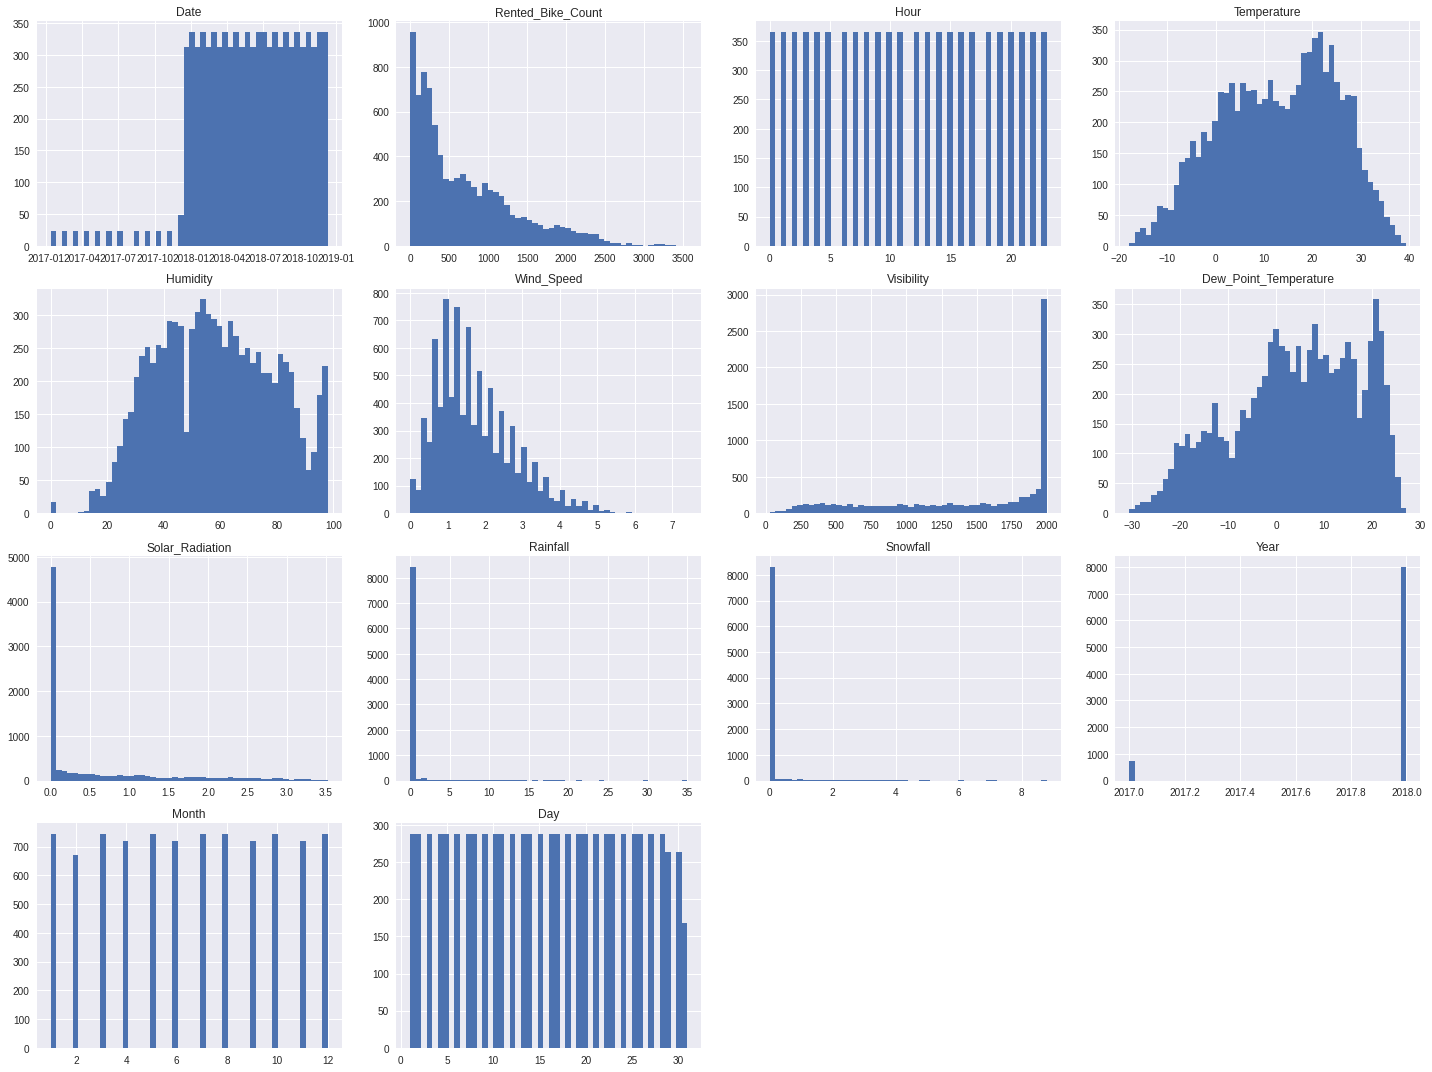

In [198]:
#We can plot histogram of the column features i.e. independent & dependent features
# a histogram plot for each numerical attribute
bike_df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

***Comment:- In this, we summarize the pattern of numerical features data.***

## **Feature Distribution-**

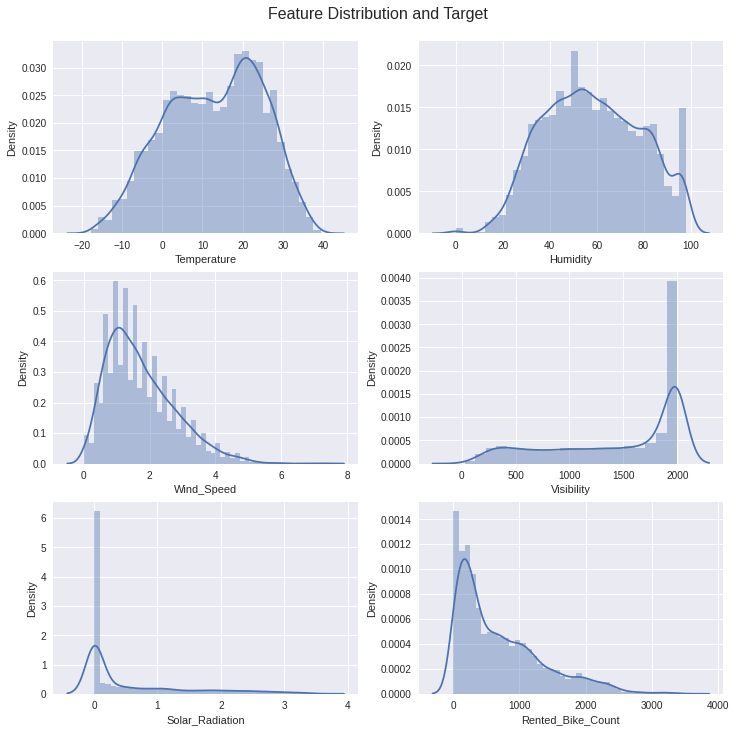

In [199]:
# set style of plot backgroud.
plt.style.use('seaborn')

# create subplot contain 6 plots (2 plot for 3 rows)
fig, ax = plt.subplots(3,2, figsize=(12,12))

# set title for figure
fig.suptitle('Feature Distribution and Target', fontsize=16, y=0.92)

# draw histogram for feature and  best fit line.
sns.distplot(bike_df.Temperature, ax=ax[0][0])
sns.distplot(bike_df.Humidity, ax=ax[0][1])
sns.distplot(bike_df.Wind_Speed, ax=ax[1][0])
sns.distplot(bike_df.Visibility, ax=ax[1][1])
sns.distplot(bike_df.Solar_Radiation, ax=ax[2][0])
sns.distplot(bike_df.Rented_Bike_Count, ax=ax[2][1])
plt.show()

***Comment:- The above plot shows that the distribution of Wind speed, Solar Radiation , Rented bike count are positively skewed whereas visibility is negatively skewed.Also, Temperature and Humidity are nearly normally distributed.***

### **Scatter plot with Season on x-axis and Count of Rented Bike on y-axis-**

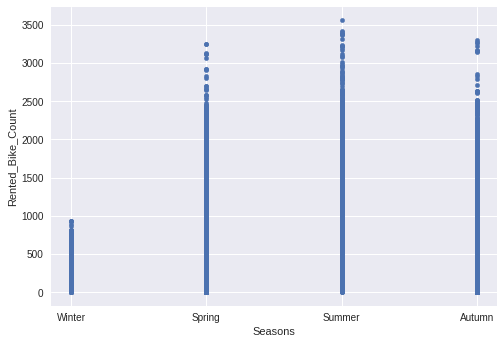

In [200]:
bike_df.plot.scatter(x='Seasons', y='Rented_Bike_Count')

***Remark:From this plot we understand that for Summer season, the people used rental bike the most and in Winter the least.***

### **Scatter plot with holiday on x-axis and count of Rented bike on y-axis-**

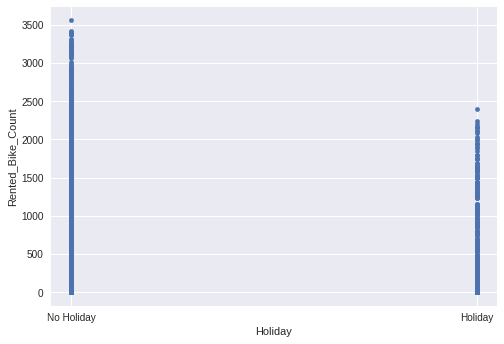

In [201]:
bike_df.plot.scatter(x="Holiday", y="Rented_Bike_Count")

***Remark:-It is clear from this plot that on holiday, people use less renal bikes. The cause for this might be that a lot of them using bikes to go to office/work and on holiday they are not using it***

### **Scatter plot with workingday on x-axis and count of Rented Bike on y-axis-**

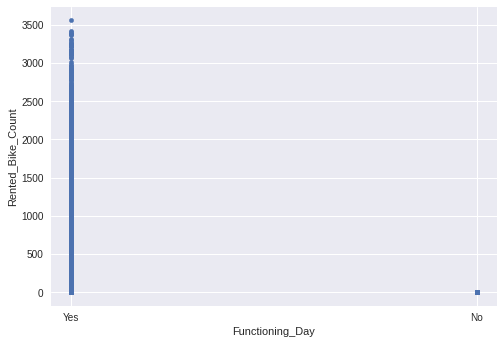

In [202]:
bike_df.plot.scatter(x="Functioning_Day", y="Rented_Bike_Count")

***Remark:-What we suspected in last plot is confirmed in this one. on workingday people used more rental bikes.***

### **Scatter plot with temperature on x-axis and countof Rented Bike on y-axis-**

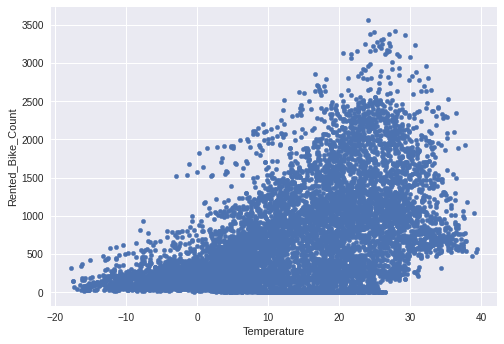

In [203]:
bike_df.plot.scatter(x="Temperature", y="Rented_Bike_Count")

***Remark:-For extreme low temperature there are very few who used bikes and as temperature increases, the count also increases.***

### **Scatter plot with humidity on x-axis and count of Rented Bike on y-axis-**

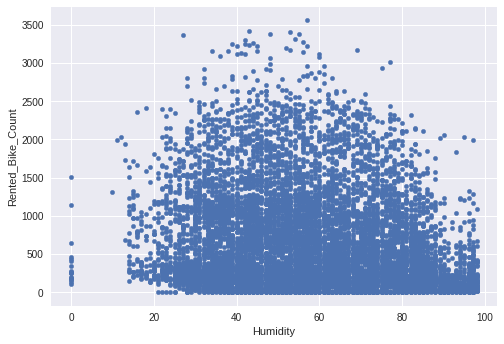

In [204]:
bike_df.plot.scatter(x="Humidity", y="Rented_Bike_Count")

***Remark:-For extremely low and high humidity less bikes are in use which makes sense as they are corresponding to adverse weather conditions.***

### **Scatter plot with windspeed on x-axis and count of Rented Bike on y-axis-**

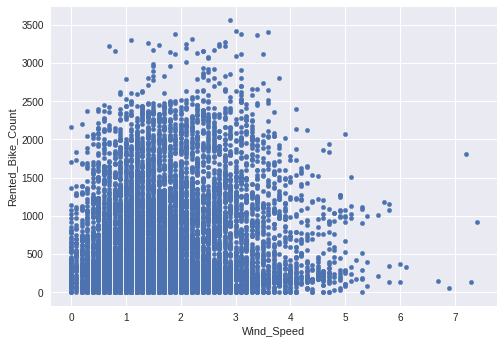

In [205]:
bike_df.plot.scatter(x="Wind_Speed", y="Rented_Bike_Count")

***Remark:-As wind speed increased, the count decreases gradually which is anticipated as again with high wind speed associated with bad weather.***

## **Comment:-In conclusion till now, we understood two important points:**
1. Many people rent bike for traveling to office and home
2. Bad weather conditions have adverse effect on bike rentals

### **Outlier Analysis using Boxplot-**


**Univariate Boxplots: Boxplot for all Numerical Variables. Also for target variable-**

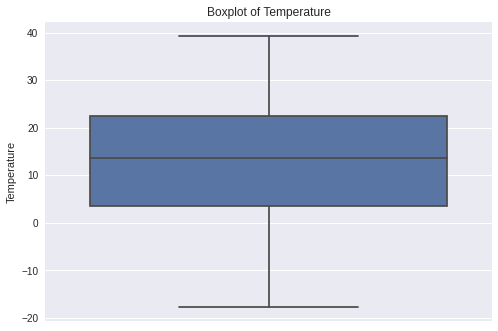

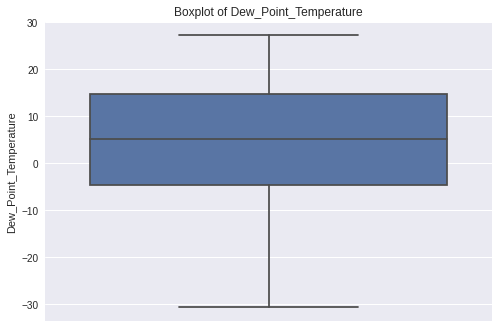

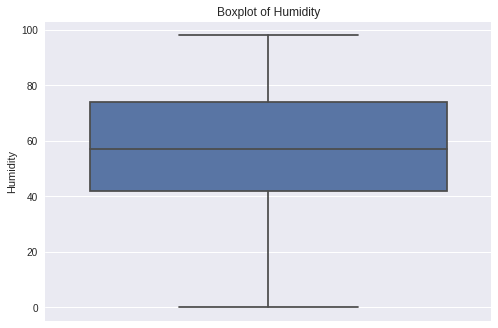

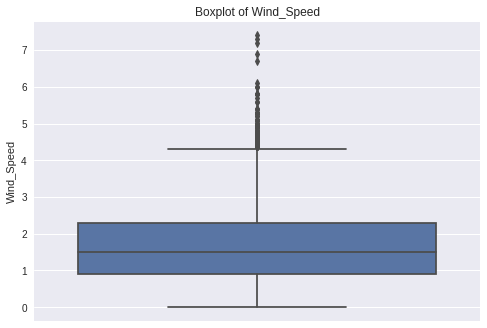

In [206]:
cat_var=['Seasons','Holiday','Day','Functioning_Day','Year','Month']
bike_df[cat_var]=bike_df[cat_var].apply(lambda x: x.astype('category') )
num_var=['Temperature','Dew_Point_Temperature','Humidity','Wind_Speed']

for i in num_var:
    sns.boxplot(y=i,data=bike_df)
    plt.title('Boxplot of '+i)
#     plt.savefig('bp'+str(i)+'.png')
    plt.show()

### **Bivariate Boxplots: Boxplot for all Numerical Variables Vs all Categorical Variables-**

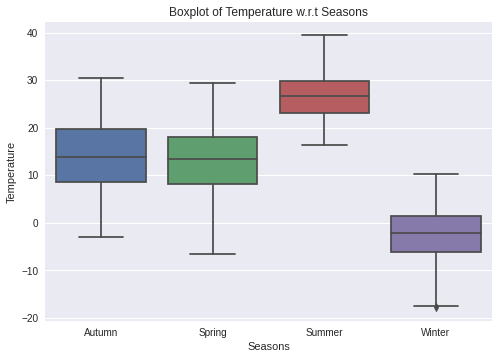

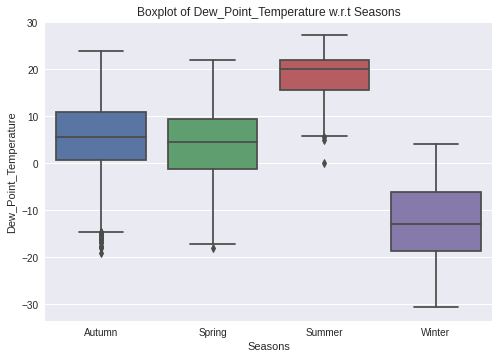

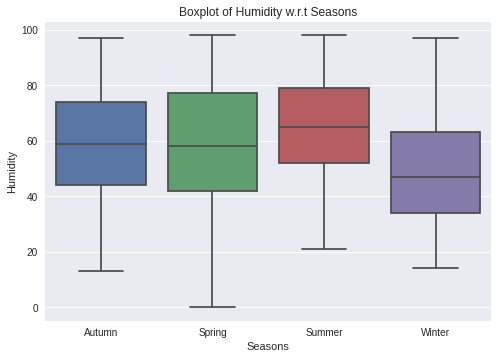

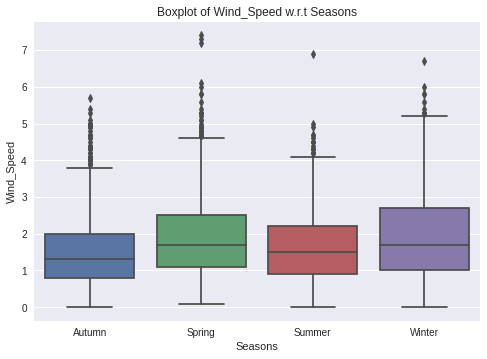

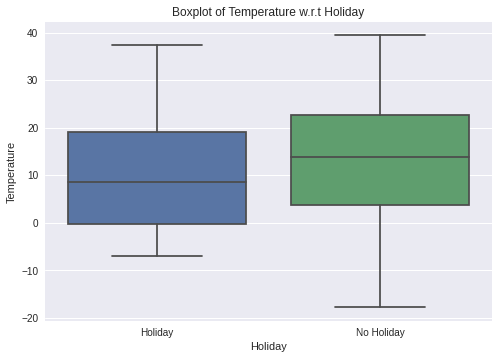

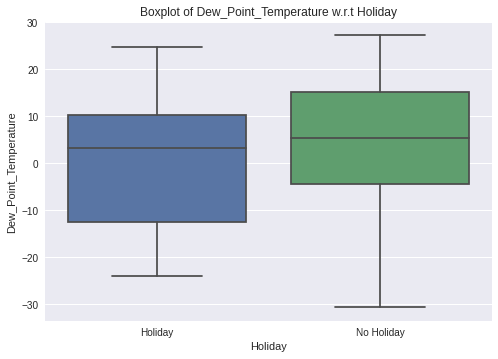

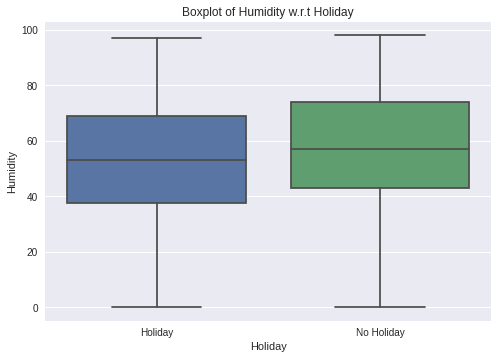

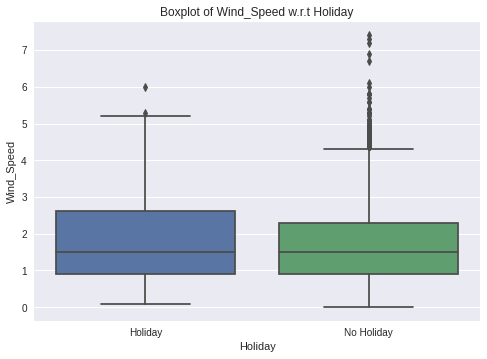

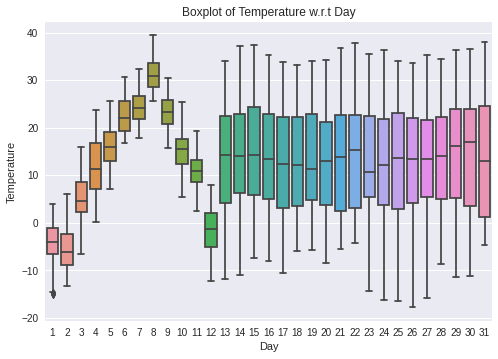

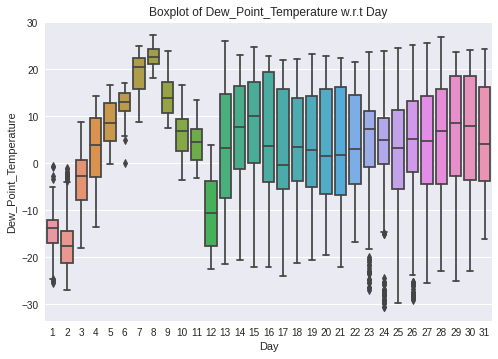

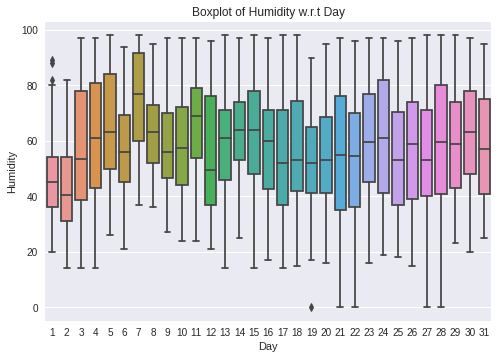

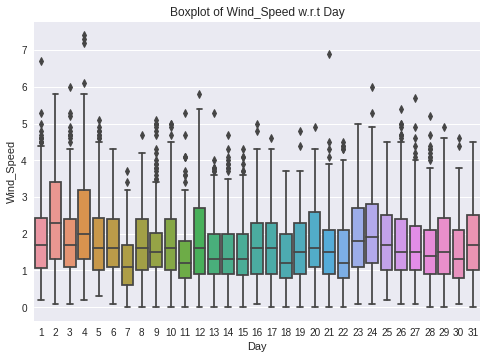

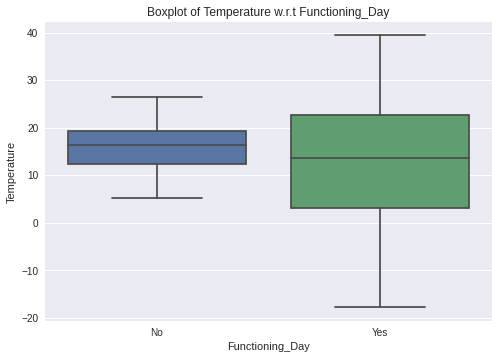

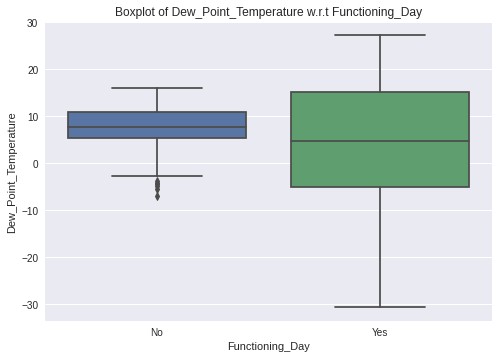

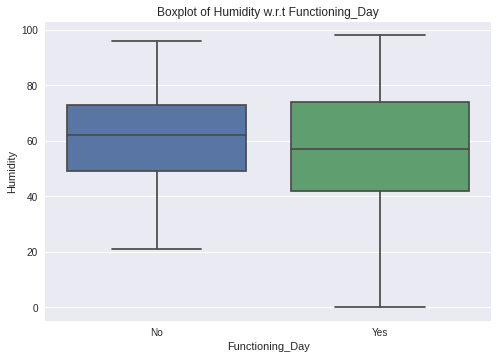

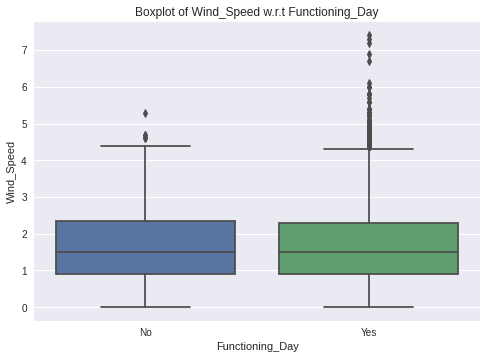

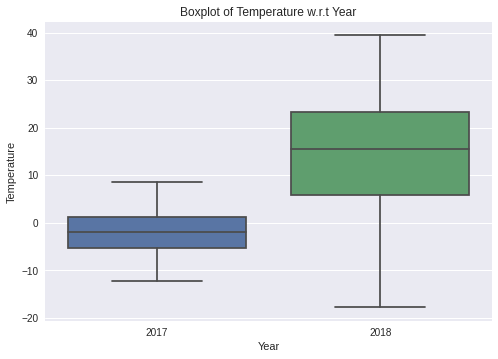

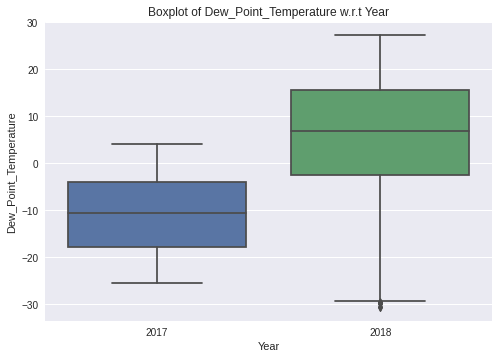

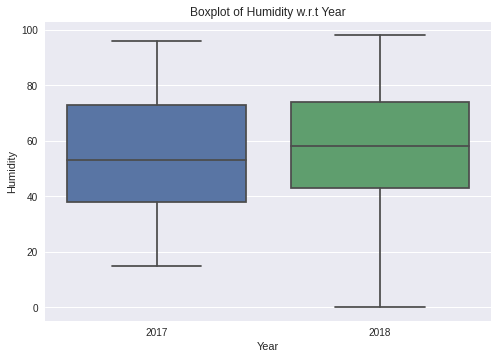

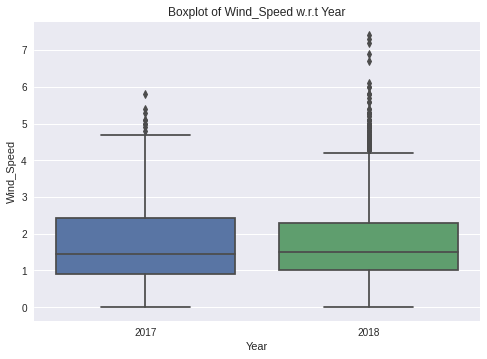

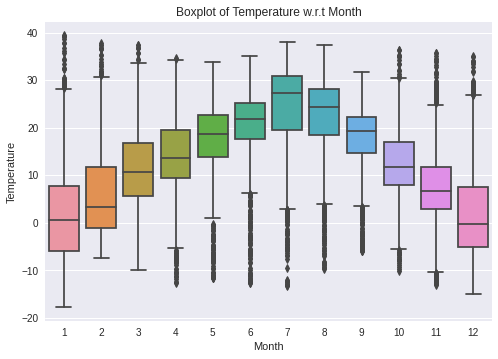

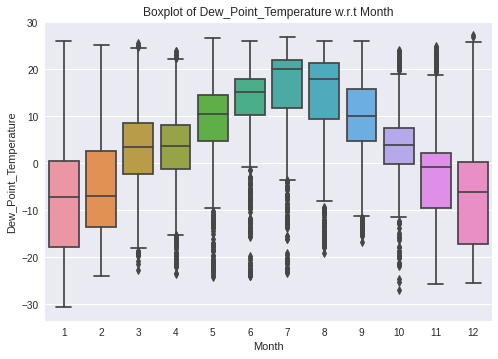

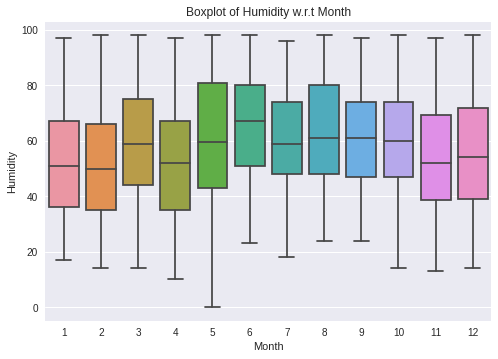

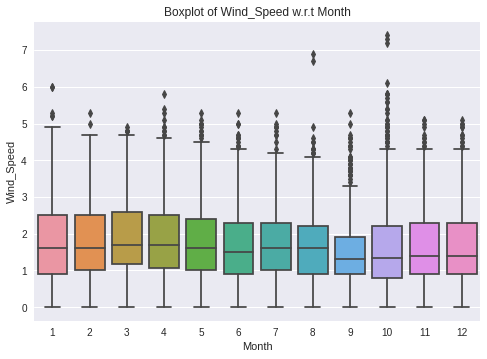

In [207]:
for a in cat_var:
    for b in num_var:
        _ = sns.boxplot(x=a,y=b,data=bike_df)
        plt.title('Boxplot of '+b+' w.r.t '+a)
#         plt.savefig('Boxplot of '+str(b)+' w.r.t '+str(a)+'.png')
        plt.show()

***Comment:-As we can see from the above Boxplots-Univariate & Bivariate only 'Dew point temperature' and 'Windspeed' features in the dataset has the outliers.*** 

### **Outlier Treatment-**

In [208]:
  # To evaluate Standard deviation for outlier treatment-
  bike_df.std()

Date                     122 days 10:34:31.669629464
Rented_Bike_Count                         644.997468
Hour                                        6.922582
Temperature                                11.944825
Humidity                                   20.362413
Wind_Speed                                    1.0363
Visibility                                608.298712
Dew_Point_Temperature                      13.060369
Solar_Radiation                             0.868746
Rainfall                                    1.128193
Snowfall                                    0.436746
dtype: object

**Remark:-Std Deviation before outlier treatment :**
standard deviation for 'dew point temperature'= 13.060369
standard deviation for 'windspeed'= 1.0363

In [209]:
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(bike_df[col], [75 ,25])        # Divide data into 75%quantile and 25%quantile.
    #Calculate IQR
    iqr = q75 - q25                                          #Inter quantile range
    #Calculate inner and outer fence  
    minimum = q25 - (iqr*1.5)                                #inner fence
    maximum = q75 + (iqr*1.5)                                 #outer fence
    #Replace with NA
    bike_df.loc[bike_df[col] < minimum,col] = np.nan         #Replace with NA
    bike_df.loc[bike_df[col] > maximum,col] = np.nan           #Replace with NA

In [210]:
outlier_treatment('Dew_Point_Temperature')

In [211]:
bike_df['Dew_Point_Temperature'].isnull().sum()

0

In [212]:
outlier_treatment('Wind_Speed')

In [213]:
bike_df['Wind_Speed'].isnull().sum()

161

### We can check the standard deviation for imputation methods-Median/Mean and therefore,standard deviation remains nearly same with median imputation. so,median is selected for imputation method.


### **REMARK:-As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.**

In [214]:
#Imputating the outliers by median Imputation-

bike_df['Wind speed'] = bike_df['Wind_Speed'].fillna(bike_df['Wind_Speed'].median())

In [215]:
#Imputating the outliers by median Imputation-

bike_df['Dew point temp'] = bike_df['Dew_Point_Temperature'].fillna(bike_df['Dew_Point_Temperature'].median())

In [216]:
bike_df.std()

Date                     122 days 10:34:31.669629464
Rented_Bike_Count                         644.997468
Hour                                        6.922582
Temperature                                11.944825
Humidity                                   20.362413
Wind_Speed                                  0.947656
Visibility                                608.298712
Dew_Point_Temperature                      13.060369
Solar_Radiation                             0.868746
Rainfall                                    1.128193
Snowfall                                    0.436746
Wind speed                                   0.93917
Dew point temp                             13.060369
dtype: object

**Remark:-Std Deviation after outlier treatment :**
standard deviation for 'Dew point temperature(°C)'= 13.060369
standard deviation for 'windspeed'= 0.93917

In [217]:
#Replacing the imputated windspeed
bike_df['Wind_Speed']=bike_df['Wind_Speed'].replace(bike_df['Wind speed'])
#Replacing the imputated dew point temperature
bike_df['Dew_Point_Temperature']=bike_df['Dew_Point_Temperature'].replace(bike_df['Dew point temp'])


In [218]:
bike_df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Month,Day,Day_Name,Wind speed,Dew point temp
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,2.2,-17.6
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,0.8,-17.6
2,2017-01-12,173,2,-6.0,39,0.8,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1.0,-17.7
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,0.9,-17.6
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,2.3,-18.6


## **Feature Scaling-**

In [219]:
bike_df[num_var].var()

Temperature              142.678850
Dew_Point_Temperature    182.396711
Humidity                 414.627875
Wind_Speed                 0.854110
dtype: float64

### **Normality Check by Plotting distribution plot and probability plot-**

Distribution before Normaliation-

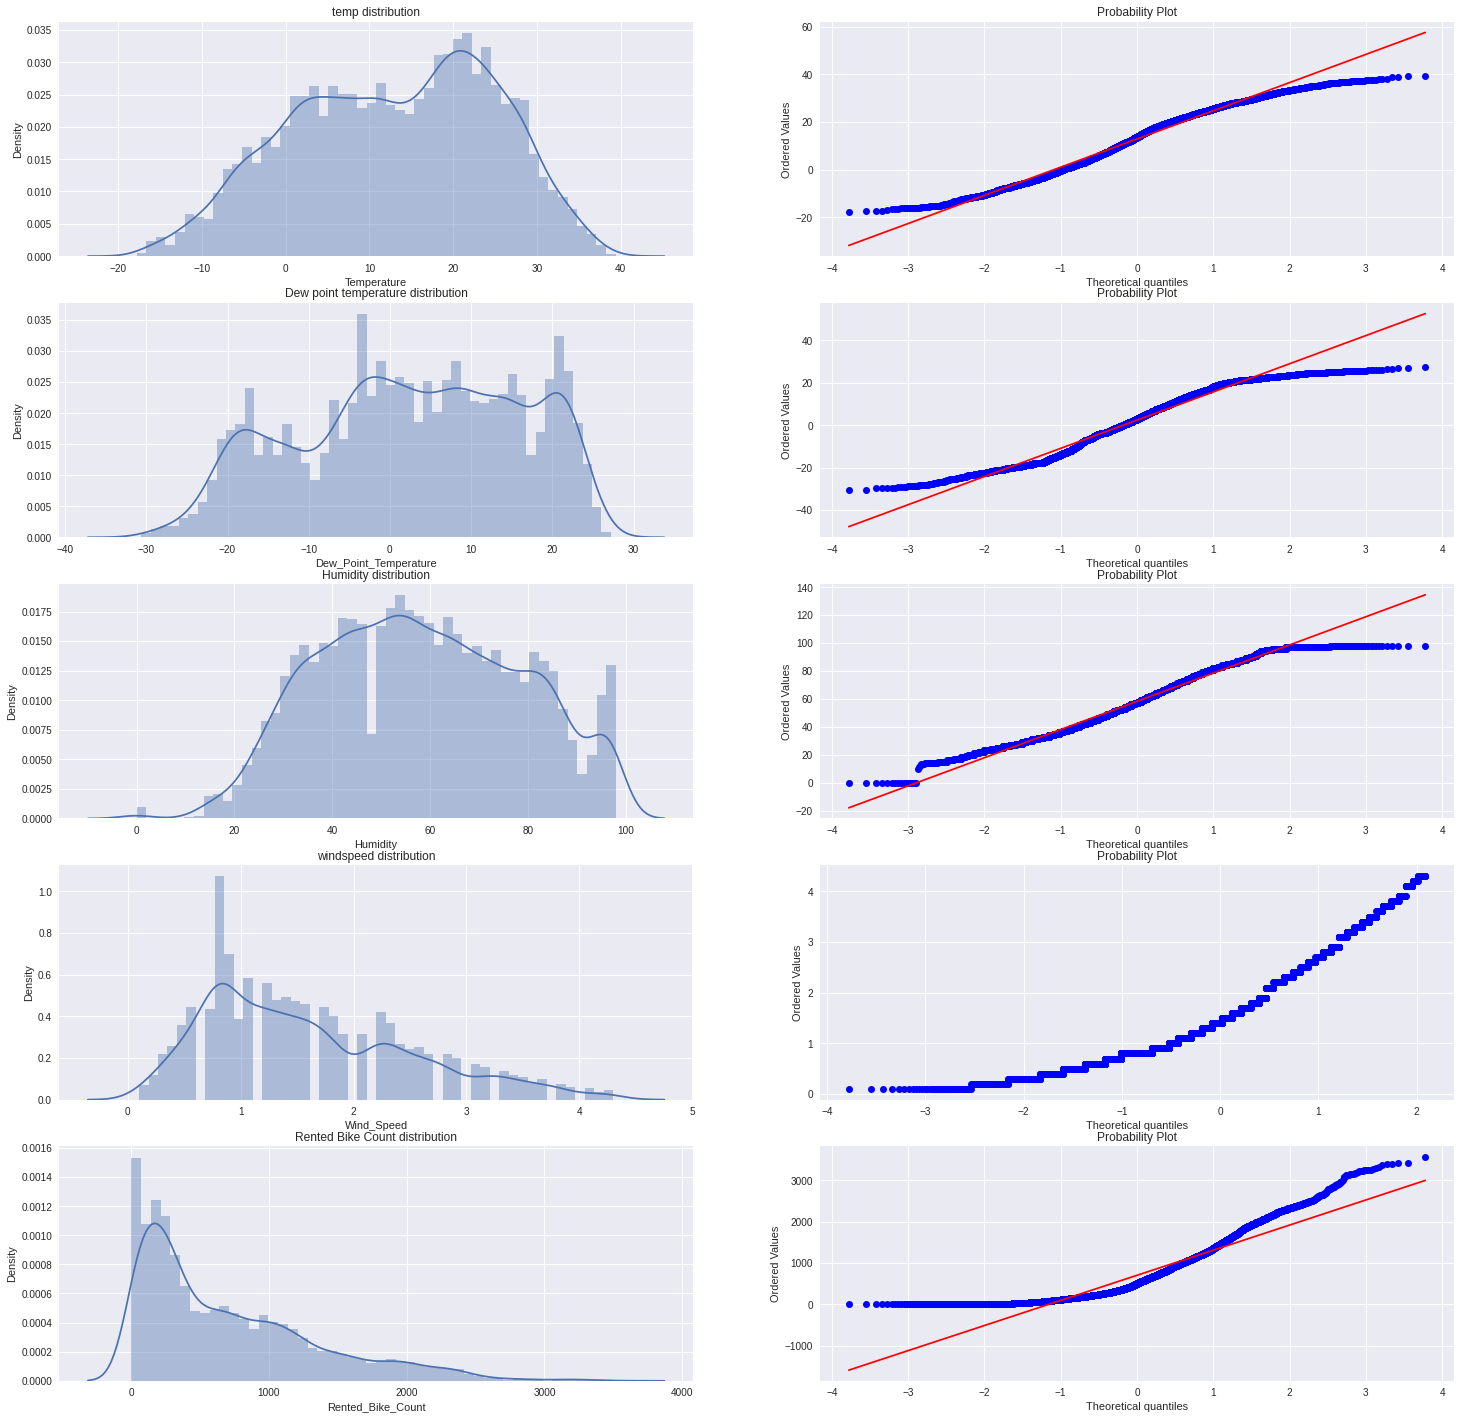

In [220]:
fig,ax = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(25, 25)
sns.distplot(bike_df['Temperature'],bins =50,ax = ax[0][0])
ax[0][0].set(title="temp distribution")
_ = stats.probplot(bike_df['Temperature'], dist='norm', fit=True,plot=ax[0][1])
ax[0][1].set(title="Probability Plot")
sns.distplot(bike_df['Dew_Point_Temperature'],bins =50,ax = ax[1][0])
ax[1][0].set(title="Dew point temperature distribution")
_ = stats.probplot(bike_df['Dew_Point_Temperature'], dist='norm', fit=True,plot=ax[1][1])
ax[1][1].set(title="Probability Plot")
sns.distplot(bike_df['Humidity'],bins =50,ax = ax[2][0])
ax[2][0].set(title="Humidity distribution")
_ = stats.probplot(bike_df['Humidity'], dist='norm', fit=True,plot=ax[2][1])
ax[2][1].set(title="Probability Plot")
sns.distplot(bike_df['Wind_Speed'],bins =50,ax = ax[3][0])
ax[3][0].set(title="windspeed distribution")
_ = stats.probplot(bike_df['Wind_Speed'], dist='norm', fit=True,plot=ax[3][1])
ax[3][1].set(title="Probability Plot")
sns.distplot(bike_df['Rented_Bike_Count'],bins =50,ax = ax[4][0])
ax[4][0].set(title="Rented Bike Count distribution")
_ = stats.probplot(bike_df['Rented_Bike_Count'], dist='norm', fit=True,plot=ax[4][1])
ax[4][1].set(title="Probability Plot")
# plt.savefig('Distribution before Normaliation.png')
plt.show()

In [221]:
#Normalisation-
for i in num_var:
    print(i)
    bike_df[i] = (bike_df[i] - min(bike_df[i]))/(max(bike_df[i]) - min(bike_df[i]))

Temperature
Dew_Point_Temperature
Humidity
Wind_Speed


**Distribution** **after** **Normalisation-**

In [222]:
bike_df[num_var].var()

Temperature              0.043608
Dew_Point_Temperature    0.054596
Humidity                 0.043172
Wind_Speed               0.048419
dtype: float64

***Comment:- After Noramalization, the variance of numerical features are seen low which will help to observe the accuaracy of the model.***

## **Multicollinearity Test-**

Preparing the new data frame with selected columns-


In [223]:
bike_df =bike_df[['Year', 'Month', 'Day', 'Rented_Bike_Count', 'Hour',  'Holiday',  'Visibility','Temperature', 
                'Humidity', 'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Wind_Speed']]

In [224]:
bike_df.dtypes

Year                     category
Month                    category
Day                      category
Rented_Bike_Count           int64
Hour                        int64
Holiday                  category
Visibility                  int64
Temperature               float64
Humidity                  float64
Dew_Point_Temperature     float64
Solar_Radiation           float64
Rainfall                  float64
Snowfall                  float64
Seasons                  category
Wind_Speed                float64
dtype: object

In [225]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Year                   8760 non-null   category
 1   Month                  8760 non-null   category
 2   Day                    8760 non-null   category
 3   Rented_Bike_Count      8760 non-null   int64   
 4   Hour                   8760 non-null   int64   
 5   Holiday                8760 non-null   category
 6   Visibility             8760 non-null   int64   
 7   Temperature            8760 non-null   float64 
 8   Humidity               8760 non-null   float64 
 9   Dew_Point_Temperature  8760 non-null   float64 
 10  Solar_Radiation        8760 non-null   float64 
 11  Rainfall               8760 non-null   float64 
 12  Snowfall               8760 non-null   float64 
 13  Seasons                8760 non-null   category
 14  Wind_Speed             8599 non-null   f

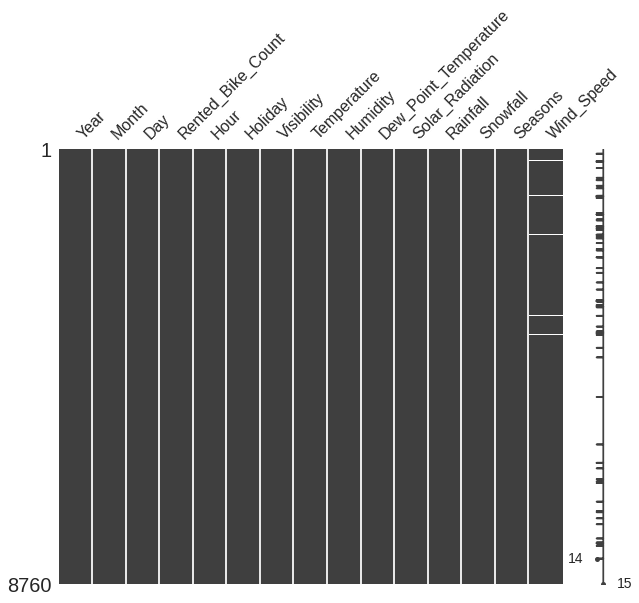

In [226]:
# checking missing values in new dataframe-
mno.matrix(bike_df,figsize=(10,8))

In [227]:
# Replacing missing values by NAN -
bike_df['Wind_Speed'].fillna('unknown',inplace=True)

In [228]:
# Importing libraries for multicollinearity-
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [229]:
def cal_vif(X):
  vif = pd.DataFrame()
  vif['Variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

In [230]:
# VIF -
cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in['Day', 'Year', 'Temperature']]])

,Variables,VIF
0,Rented_Bike_Count,3.590435
1,Hour,4.161441
2,Visibility,4.361638
3,Humidity,11.548679
4,Dew_Point_Temperature,14.164964
5,Solar_Radiation,1.810299
6,Rainfall,1.094684
7,Snowfall,1.100190


**Comment:- From above Dataframe, we see that there is Multicollinearity in our Data for-**
**Dew point temperature(°C) and Humidity(%) has highest VIF value**



### Now we will drop the highest mulicolinearity column-



Feature Engineering on numerical Features-
we know that dew point temp and humidity are both temperature values and are very highly correlated with each other.
## **we will aggregate those 2 columns and derive a new feature.**

In [231]:
columns = ['Humidity','Dew_Point_Temperature']
bike_df['mean_Humidity'] = bike_df.apply(lambda row: row[columns].mean(), axis=1)
bike_df.head()


,Year,Month,Day,Rented_Bike_Count,Hour,Holiday,Visibility,Temperature,Humidity,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Wind_Speed,mean_Humidity
0,2017,1,12,254,0,No Holiday,2000,0.220280,0.377551,0.224913,0.0,0.0,0.0,Winter,0.5,0.301232
1,2017,1,12,204,1,No Holiday,2000,0.215035,0.387755,0.224913,0.0,0.0,0.0,Winter,0.166667,0.306334
2,2017,1,12,173,2,No Holiday,2000,0.206294,0.397959,0.223183,0.0,0.0,0.0,Winter,0.166667,0.310571
3,2017,1,12,107,3,No Holiday,2000,0.202797,0.408163,0.224913,0.0,0.0,0.0,Winter,0.190476,0.316538
4,2017,1,12,78,4,No Holiday,2000,0.206294,0.367347,0.207612,0.0,0.0,0.0,Winter,0.52381,0.287480


In [232]:
#To drop columns-
bike_df = bike_df.drop(['Humidity','Dew_Point_Temperature'],axis = 1)

In [233]:
# To view the dataset after dropping columns-
bike_df.head()

,Year,Month,Day,Rented_Bike_Count,Hour,Holiday,Visibility,Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Wind_Speed,mean_Humidity
0,2017,1,12,254,0,No Holiday,2000,0.220280,0.0,0.0,0.0,Winter,0.5,0.301232
1,2017,1,12,204,1,No Holiday,2000,0.215035,0.0,0.0,0.0,Winter,0.166667,0.306334
2,2017,1,12,173,2,No Holiday,2000,0.206294,0.0,0.0,0.0,Winter,0.166667,0.310571
3,2017,1,12,107,3,No Holiday,2000,0.202797,0.0,0.0,0.0,Winter,0.190476,0.316538
4,2017,1,12,78,4,No Holiday,2000,0.206294,0.0,0.0,0.0,Winter,0.52381,0.287480


# **One-Hot Encoding-**

we will use one-hot encoding techniques on categorical variables - Season,Holiday,Year

In [234]:
bike_df.nunique()

Year                    2
Month                  12
Day                    31
Rented_Bike_Count    2166
Hour                   24
Holiday                 2
Visibility           1789
Temperature           546
Solar_Radiation       345
Rainfall               61
Snowfall               51
Seasons                 4
Wind_Speed             41
mean_Humidity        7190
dtype: int64

In [235]:
one_hot_var = ['Seasons','Holiday','Year']

In [236]:
#Creating dummies for categorical variables-
for i in one_hot_var:
    ''' Creating dummies for each variable in one_hot_var and merging dummies dataframe to our original dataframe '''
    temp= pd.get_dummies(bike_df[i], prefix = i)
    bike_df = bike_df.join(temp)

In [237]:
bike_df.columns

Index(['Year', 'Month', 'Day', 'Rented_Bike_Count', 'Hour', 'Holiday',
       'Visibility', 'Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Wind_Speed', 'mean_Humidity', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Year_2017', 'Year_2018'],
      dtype='object')

In [238]:
bike_df = bike_df.drop(['Seasons','Holiday','Year'],axis = 1)


**Let's check the new data frame**-

In [239]:
new_df=bike_df.columns
new_df

Index(['Month', 'Day', 'Rented_Bike_Count', 'Hour', 'Visibility',
       'Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Wind_Speed',
       'mean_Humidity', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday', 'Year_2017',
       'Year_2018'],
      dtype='object')

In [240]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Month               8760 non-null   category
 1   Day                 8760 non-null   category
 2   Rented_Bike_Count   8760 non-null   int64   
 3   Hour                8760 non-null   int64   
 4   Visibility          8760 non-null   int64   
 5   Temperature         8760 non-null   float64 
 6   Solar_Radiation     8760 non-null   float64 
 7   Rainfall            8760 non-null   float64 
 8   Snowfall            8760 non-null   float64 
 9   Wind_Speed          8760 non-null   object  
 10  mean_Humidity       8760 non-null   float64 
 11  Seasons_Autumn      8760 non-null   uint8   
 12  Seasons_Spring      8760 non-null   uint8   
 13  Seasons_Summer      8760 non-null   uint8   
 14  Seasons_Winter      8760 non-null   uint8   
 15  Holiday_Holiday     8760 non-null   ui

In [241]:
# convert the type of all columns of DataFrame-
df = bike_df.apply(pd.to_numeric,errors='coerce') # convert all columns of DataFrame

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Month               8760 non-null   int64  
 1   Day                 8760 non-null   int64  
 2   Rented_Bike_Count   8760 non-null   int64  
 3   Hour                8760 non-null   int64  
 4   Visibility          8760 non-null   int64  
 5   Temperature         8760 non-null   float64
 6   Solar_Radiation     8760 non-null   float64
 7   Rainfall            8760 non-null   float64
 8   Snowfall            8760 non-null   float64
 9   Wind_Speed          8599 non-null   float64
 10  mean_Humidity       8760 non-null   float64
 11  Seasons_Autumn      8760 non-null   uint8  
 12  Seasons_Spring      8760 non-null   uint8  
 13  Seasons_Summer      8760 non-null   uint8  
 14  Seasons_Winter      8760 non-null   uint8  
 15  Holiday_Holiday     8760 non-null   uint8  
 16  Holida

In [243]:
# To replace the values of infinity -
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

In [244]:
df.head()

,Month,Day,Rented_Bike_Count,Hour,Visibility,Temperature,Solar_Radiation,Rainfall,Snowfall,Wind_Speed,mean_Humidity,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Year_2017,Year_2018
0,1,12,254,0,2000,0.220280,0.0,0.0,0.0,0.500000,0.301232,0,0,0,1,0,1,1,0
1,1,12,204,1,2000,0.215035,0.0,0.0,0.0,0.166667,0.306334,0,0,0,1,0,1,1,0
2,1,12,173,2,2000,0.206294,0.0,0.0,0.0,0.166667,0.310571,0,0,0,1,0,1,1,0
3,1,12,107,3,2000,0.202797,0.0,0.0,0.0,0.190476,0.316538,0,0,0,1,0,1,1,0
4,1,12,78,4,2000,0.206294,0.0,0.0,0.0,0.523810,0.287480,0,0,0,1,0,1,1,0


In [245]:
df.shape

(8760, 19)

**Data Preprocessing**

In [246]:
#defining dependent and independent variables 
dependent_variable = 'Rented_Bike_Count'
independent_variable = ['Month', 'Day', 'Hour', 'Visibility', 'Temperature', 'Solar_Radiation','Rainfall',
       'Snowfall', 'Wind_Speed', 'mean_Humidity', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer' , 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Year_2017', 'Year_2018']
     
       

In [247]:
#defining X and y varaibles 
y = df[dependent_variable]
X = df[independent_variable]

# **MODEL FITTING-**

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

**Splitting the dataset into train and test in the ratio of 70:30**

In [249]:
#splitting train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [250]:
#size of train and test datasets
print(f'Size of X_train is: {X_train.shape}')
print(f'Size of X_test is: {X_test.shape}')
print(f'Size of y_train is: {y_train.shape}')
print(f'Size of y_test is: {y_test.shape}')

Size of X_train is: (6132, 18)
Size of X_test is: (2628, 18)
Size of y_train is: (6132,)
Size of y_test is: (2628,)


In [251]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [252]:
#load the required libraries
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

## DECISION TREE REGRESSOR

In [253]:
#training the model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [254]:
#Fit the trained model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [255]:
#Accuracy score of the model
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.6158408104641209


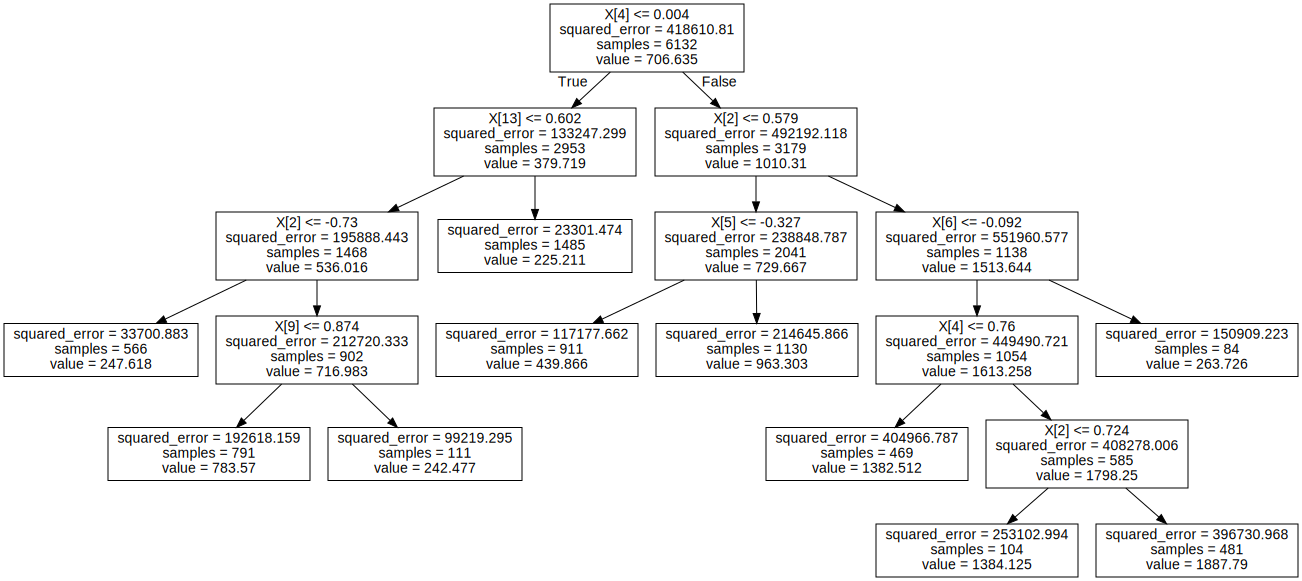

In [256]:
#Plot the learned model
from sklearn import tree
import pydot
import graphviz

# export the learned model to tree
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

Cross validation prediction-

In [257]:
predict=cross_val_predict(dtr,X_train,y_train,cv=5)
predict

array([ 226.35514019,  226.35514019,  809.19202899, ...,  969.80600214,
        285.73497424, 1899.68950749])

Cross validation prediction plot-

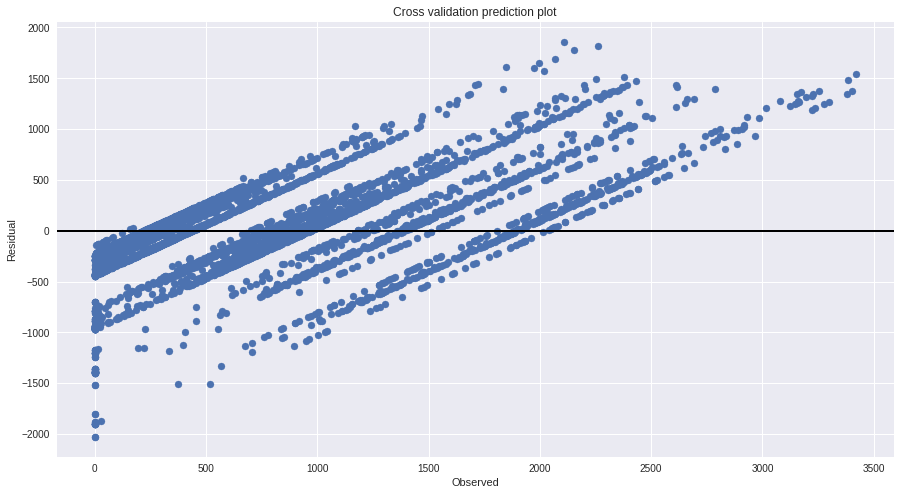

In [258]:
# Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

***Comment:- In this plot,some data points are have same finite variance between them and for some are not have it.***

### **Model evalution metrics-**

In [259]:
#R-squared scores
r2_scores = cross_val_score(dtr, X_train, y_train, cv=5)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.6027458965855259


***Comment:-The R-squared or coefficient of determination is 0.60 on average for 5-fold cross validation ,it means that predictor is only able to predict 60% of the variance in the target variable which is contributed by independent variables.***

### **Model performance on test dataset-**

In [260]:
#predict the model
dtr_pred=dtr.predict(X_test)
dtr_pred

array([963.30265487, 963.30265487, 963.30265487, ..., 783.57016435,
       225.21077441, 225.21077441])

In [261]:
import math
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 401.3963331688488
Mean absolute error : 275.3594971128793


Residual plot


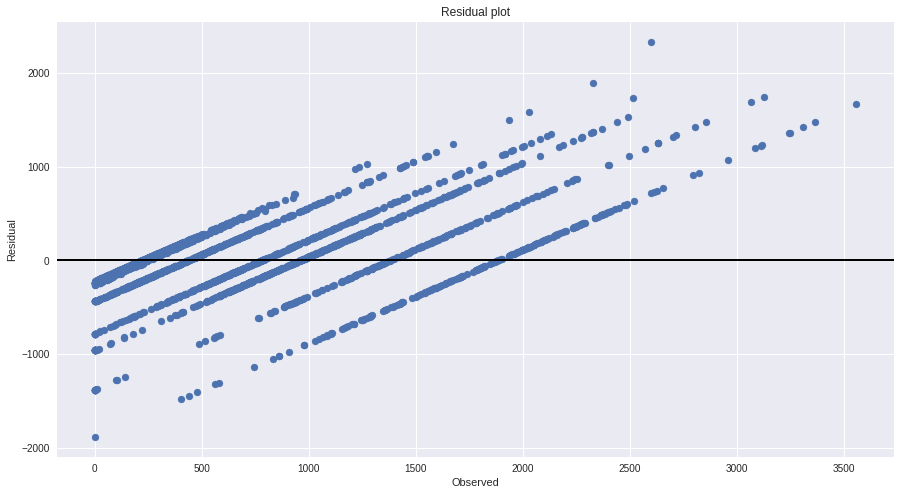

In [262]:
#Residual scatter plot
residuals = y_test-dtr_pred
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

***Comment:-In this plot, some data points are have same finite variance between them and for some are not have it***

***Comment:- In Decision Tree Regressor, the accuracy of the model is 62% i.e.increase by 30% as compare to regression model(linear & lasso)***

### GRADIENT BOOSTING REGRESSOR

In [263]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a  model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

print('Metrics for test data set :',)
#accuracy of the model
rf_score =model.score(X_test,y_test)
print('Accuracy of the model :',rf_score)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')


GradientBoostingRegressor() 

Metrics for test data set :
Accuracy of the model : 0.7754879764664544
MSE: 92002.80598824933
RMSE: 303.31964326144345
R2: 0.7754879764664544


In [264]:
print('Metrics for train data set :',)
#accuracy of the model
rf_score =model.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

# Evaluate the model using the train data

predict_train=model.predict(X_train)
mse = mean_squared_error(y_train,predict_train)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_train,predict_train)
print(f'R2: {r2}')


Metrics for train data set :
Accuracy of the model : 0.7908843381493993
MSE: 87538.0765321632
RMSE: 295.86834324098146
R2: 0.7908843381493993


In [265]:
#Cross validation prediction
predict=cross_val_predict(model,X_train,y_train,cv=5)
predict

array([-1.06091436e+00,  2.88100206e+02,  6.94441726e+02, ...,
        9.91617341e+02,  3.43357723e+02,  1.48656685e+03])

Polynomial function:  
0.7402 x + 175.8


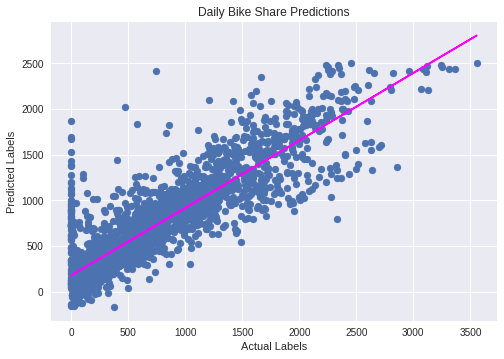

In [266]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.
p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test
plt.show()

# Optimize Hyperparameters


Let's try using a grid search approach to try combinations from a grid of possible values for the learning_rate and n_estimators  hyperparameters of the GradientBoostingRegressor estimator.

In [271]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Trying these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [60, 120, 155]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=5, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

Best parameter combination: {'learning_rate': 0.5, 'n_estimators': 120} 



In [268]:
# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

print('Metrics for test data set :',)
#accuracy of the model
rf_score =model.score(X_test,y_test)
print('Accuracy of the model :',rf_score)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


GradientBoostingRegressor(learning_rate=0.5, n_estimators=120) 

Metrics for test data set :
Accuracy of the model : 0.8006725976778479
MSE: 81682.39738504069
RMSE: 285.80132502324176
R2: 0.8006725976778479


In [269]:
print('Metrics for train data set :',)
#accuracy of the model
rf_score =model.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

# Evaluate the model using the train data

mse = mean_squared_error(y_train,predict_train)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_train,predict_train)
print("R2:", r2)

Metrics for train data set :
Accuracy of the model : 0.8825561986530651
MSE: 87538.0765321632
RMSE: 295.86834324098146
R2: 0.7908843381493993


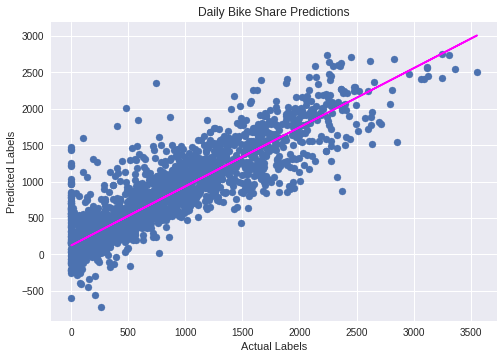

In [270]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

***Comment:- We observe that , using hyperparameter tunning for Gradient Boosting Regressor was best idea.***

**Without Hyperparameter tunning-**

1.   Accuracy of the model of train data set is **79%**
2.   Accuracy of the model of test data set is  **77%**

**With Hyperparameter tunning-**

1.   Accuracy of the model of train data set is **90%**
2.   Accuracy of the model of test data set is  **80%**




### ***OVERALL CONCLUSION OF MODELS-***


*   We fitted Decision Tree regressor and Gradient Boosting Regressor models.
*   Overall we observe that, Gradient Boosting Regressor are the best fitted model for the train and test data set.
* Gradient Boosting Regressor has the accuracy rate of train data set 79% and test data set 77%. Also,MSE is 463.08 for train data set and 309.65 for test data set. With hyperparameter tunning the accuracy of the model increased and RMSE decreases which implies that the model fitted is the best model for higher accuracy rate of regression models with the predictions.

**With Hyperparameter tunning**-


1.  Accuracy of the model of train data set is 90%

2.  Accuracy of the model of test data set is 80%

3.  RMSE of the model of train data set is 463.08 

4.   RMSE of the model of test data set is 285.46


*   **Among, all the above models we conclude that Gradient Boosting Regressor(With hyperparameter tunning) is the best fitted model for Seoul Bike Rental Prediction data set.**














